0.9622140083086946
[-401.80783203514, 9.143008194183928e-07, 4.436587253823394, -26.430362527326583, 0.7044229541833672, 44.41372435663572]


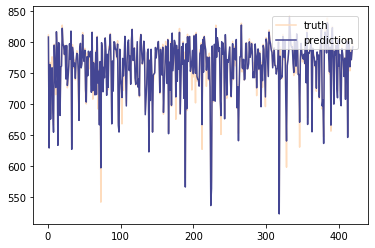

<Figure size 648x1152 with 0 Axes>

In [1]:
# 安装 python 3.x
# 安装包 `pip install scikit-learn matplotlib numpy pandas`
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取 xls
data = pd.read_excel('./original20191001to20191031.xlsx')

# 提取列
T = np.array(data['TotalEsr%'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
D = np.array(data['Dnbnumber'])
TD = T * D
B = np.array(data['BIC'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
G = np.array(data['accGRR'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
S = np.array(data['SNR'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
F = np.array(data['FIT'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
# 真实值
Y = np.array(data['Reads(M)'])

# 训练集
training_set = np.c_[TD, B, G, S, F]

# 定义模型
model = LinearRegression(fit_intercept=True, normalize=False)
# 训练
model.fit(training_set, Y)
# 打印相关系数
print(model.score(training_set, Y))

# 折线图
plt.plot(np.arange(1, 420), Y, label='truth', color='#fedcbd')
plt.plot(np.arange(1, 420), model.predict(training_set), label='prediction', color='#444693')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=1.)
plt.figure(figsize=(9, 16))
plt.show()

# 打印系数
b = model.intercept_
bs = model.coef_.tolist()
print([b] + bs)